In [1]:
import pyrealsense2 as rs
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
pipeline = rs.pipeline()
config = rs.config()
config.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)
config.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)

# Start streaming
pipeline.start(config)

In [3]:
frames = pipeline.wait_for_frames()
depth_frame = frames.get_depth_frame()
color_frame = frames.get_color_frame()

# Convert images to numpy arrays
depth_image = np.asanyarray(depth_frame.get_data())
color_image = np.asanyarray(color_frame.get_data())
depth_colormap = cv2.applyColorMap(cv2.convertScaleAbs(depth_image, alpha=0.03), cv2.COLORMAP_JET)
images = np.hstack((color_image, depth_colormap))

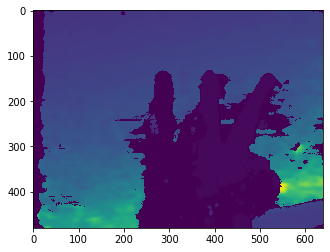

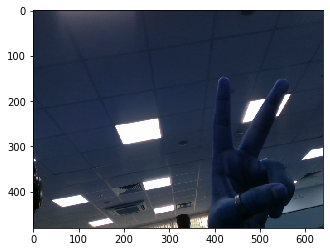

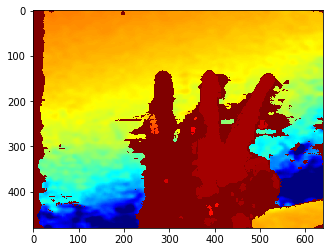

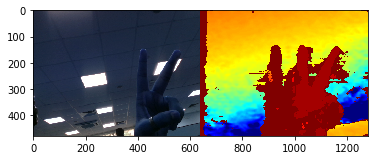

In [4]:
image_list=[depth_image, color_image, depth_colormap, images]

for image in image_list:
    plt.imshow(image)
    plt.show()